In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import model_evaluation_utils as meu

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords


In [ ]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
STOPWORDSS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel(r'/content/drive/MyDrive/hatedetectionwithnetworkanalysis/NCCS_Dataset_english.xlsx')
df['Text'].isnull().sum()
df=df.dropna() # deleting the empty not available columns 
print(df.dropna().index)
df.isnull().sum()
print(df.head())

#df=df[~df["Text"].str.contains(r'[0-9]', na=False)]
len(df)

In [ ]:
df.Text

0        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
1        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
2        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
3        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
4        !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
                               ...                        
27437    John, This guy has been trying to get in touch...
27438    October 2001 Vol. 53 [IMAGE] [IMAGE] [IMAGE] [...
27439    The report named: NG - PROPT P/L published as ...
27440    Here is the EOL information Dutch -----Origina...
27441    The report named: NG - Price P/L published as ...
Name: Text, Length: 27421, dtype: object

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white').generate(' '.join(df.Text.astype("str")))
# Plot
plot_cloud(wordcloud)


No handles with labels found to put in legend.


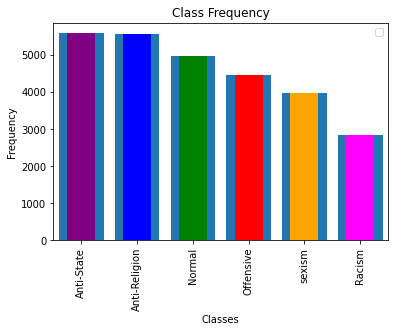

In [ ]:
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['Label'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Class Frequency') 
ax.set_xlabel('Classes') 
ax.set_ylabel('Frequency')
ax.legend()

df['Label'].value_counts().plot.bar(color=['purple', 'blue', 'green', 'red', 'orange', 'magenta'])

plt.savefig("barchart_class.png", dpi=700, bbox_inches="tight")


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)
df = shuffle(df)

In [ ]:
df['Text'].head()

2795     @JayyRosayy you ain't got no hoes lil jess you...
2456     @Farrahisawhore @PersianFarrah nice account fa...
14141    After #BringBackOurGirls here is #BringBackOur...
8028         @ChubsSays @comattwow ...who is arguing that?
25832    no real bias today positive numbers sell negat...
Name: Text, dtype: object

In [ ]:
df.Label.value_counts()

Anti-State       5591
Anti-Religion    5565
Normal           4979
Offensive        4476
sexism           3972
Racism           2838
Name: Label, dtype: int64

In [ ]:
df.Label.value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of tweets', 
                                                                title='Number of tweets in each category')

In [ ]:
df.Label.head()

2066         Offensive
24473           Normal
23957           Normal
22162    Anti-Religion
17279    Anti-Religion
Name: Label, dtype: object

In [ ]:
pip install emoji


     |████████████████████████████████| 133kB 13.7MB/s 


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#text preprocessing


import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
import emoji
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Function to remove the stopwords
nltk.download('stopwords')


df = df.reset_index(drop=True)
# pre-processing code
def clean_text(text,replace=''):
    lemmatizer = WordNetLemmatizer() 
    stop_words = set(stopwords.words('english'))
    text = emoji.demojize(str(text))
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation characters
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"http\S+", "", text)  # removes URL from string
    text = text.replace('rt', '').replace('pm', '').replace('xd', '').replace('subject', '').replace('phillip', '')
    
    text = ' '.join(filter(lambda x: lemmatizer.lemmatize(x, pos ="a") not in stop_words, text.split()))
    text = " ".join(re.split("\s+", text, flags=re.UNICODE))
    return text

# apply pre-processing on sentences
df['Text'] = df['Text'].apply(clean_text)
df['Text'] = df['Text'].replace('', np.nan)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['Text'].head()

0      jayyrosayy aint got hoes lil jess youre lil guy
1     farrahisawhore persianfarrah nice account faggot
2    bringbackourgirls bringbackourboys sad extremi...
3                          chubssays comattwow arguing
4    real bias today positive numbers sell negative...
Name: Text, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Import package
from wordcloud import WordCloud
sentences = ' '.join(df["Text"])
tokens = word_tokenize(sentences)
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(frequency_dist)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig("pre-processd_data.png", dpi=700)
plt.show()


In [ ]:
#LSTM Modeling
#Vectorize consumer complaints text, by turning each text into either a sequence of integers or into a vector.
#Limit the data set to the top 5,0000 words.
#Set the max number of words in each complaint at 250.

In [ ]:
# The maximum number of words to be used. (most frequent)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
MAX_NB_WORDS = 50000
# Max number of words in each TWEET.
MAX_SEQUENCE_LENGTH = 170
# This is fixed.
EMBEDDING_DIM = 170
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 45962 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (27406, 170)


In [ ]:
#Converting categorical labels to numbers.
#Offensive= '3'
#Anti-State= '1'
#Anti-Religion= '0'
#Normal='2'
#Racism= '4'
#sexism='5'

Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (27406, 6)


In [ ]:
#Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(19184, 170) (19184, 6)
(8222, 170) (8222, 6)


In [ ]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dense(units=128, activation="relu",kernel_regularizer=regularizers.l2(0.00000001)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(units=64, activation="relu"))#,recurrent_dropout=0.15
model.add(Dense(units=28, activation="relu",kernel_regularizer=regularizers.l2(0.00000001)))#, 
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 200
batch_size = 256

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)#,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001])

Epoch 1/200
68/68 [==============================] - 12s 141ms/step - loss: 1.5044 - accuracy: 0.3612 - val_loss: 0.3937 - val_accuracy: 0.8760
Epoch 2/200
68/68 [==============================] - 9s 128ms/step - loss: 0.2621 - accuracy: 0.9171 - val_loss: 0.2594 - val_accuracy: 0.9218
Epoch 3/200
68/68 [==============================] - 8s 125ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.2912 - val_accuracy: 0.9255
Epoch 4/200
68/68 [==============================] - 9s 128ms/step - loss: 0.0319 - accuracy: 0.9917 - val_loss: 0.3255 - val_accuracy: 0.9260
Epoch 5/200
68/68 [==============================] - 9s 127ms/step - loss: 0.0109 - accuracy: 0.9979 - val_loss: 0.3450 - val_accuracy: 0.9307
Epoch 6/200
68/68 [==============================] - 9s 126ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.3825 - val_accuracy: 0.9234
Epoch 7/200
68/68 [==============================] - 8s 124ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.4615 - val_accuracy: 0.923

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 170, 170)          8500000   
_________________________________________________________________
dense_24 (Dense)             (None, 170, 128)          21888     
_________________________________________________________________
lstm_14 (LSTM)               (None, 170, 128)          131584    
_________________________________________________________________
lstm_15 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 28)                1820      
_________________________________________________________________
dense_27 (Dense)             (None, 6)                

In [ ]:
accr_model = model.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model[0],accr_model[1]))

257/257 [==============================] - 2s 9ms/step - loss: 0.5045 - accuracy: 0.9427
Test set
  Loss: 0.505
  Accuracy: 0.943


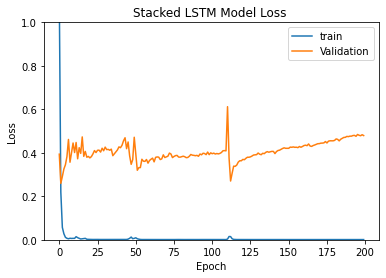

In [ ]:
import matplotlib.pyplot as plt
plt.title('Stacked LSTM Model Loss ')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

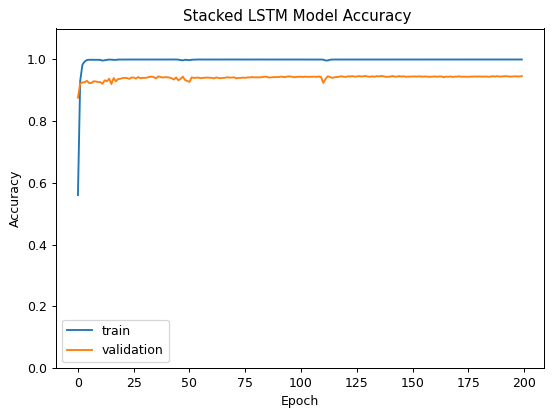

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Stacked LSTM Model Accuracy ')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
#different models for the implementation of the lstms versions
# 3 LSTM layers model
model_1 = Sequential()
model_1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X.shape[1])) #input_length=X.shape[1] replace with the input shape, X_train.shape[1] in place of X.shape
model_1.add(LSTM(units=128, return_sequences=False))
model_1.add(Dense(16))
#model_1.add(Dropout(rate=0.25))
model_1.add(Dense(6, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

epochs = 50
batch_size = 64

history_1 = model_1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 170, 170)          8500000   
_________________________________________________________________
lstm_16 (LSTM)               (None, 128)               153088    
_________________________________________________________________
dense_28 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 102       
Total params: 8,655,254
Trainable params: 8,655,254
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
270/270 [==============================] - 28s 97ms/step - loss: 0.9075 - accuracy: 0.6703 - val_loss: 0.1605 - val_accuracy: 0.9495
Epoch 2/50
270/270 [==============================] - 26s 96ms/step - loss: 0.0573 - accuracy: 0.9

In [ ]:
accr_model_1 = model_1.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model_1[0],accr_model_1[1]))

257/257 [==============================] - 2s 6ms/step - loss: 0.1910 - accuracy: 0.9417
Test set
  Loss: 0.191
  Accuracy: 0.942


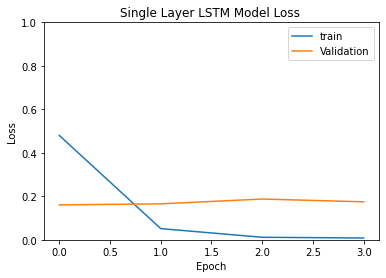

In [ ]:
import matplotlib.pyplot as plt
plt.title('Single Layer LSTM Model Loss ')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

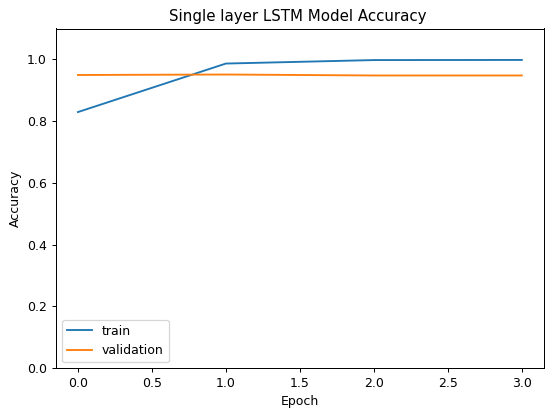

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Single layer LSTM Model Accuracy ')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# LSTM with Conv1D layer
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D 
from keras.layers import Activation   
model_2 = Sequential()
model_2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X.shape[1]))
model_2.add(Conv1D(filters=32, kernel_size=3, padding='same'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(LSTM(units=64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(LSTM(units=64, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(LSTM(units=64, return_sequences=False, dropout=0.2, recurrent_dropout=0.15))
model_2.add(Dense(16))
model_2.add(Activation('relu'))
model_2.add(Dropout(rate=0.25))
model_2.add(Dense(6, activation='softmax'))
from keras.optimizers import SGD
opt = SGD(lr=0.1)
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# optimizer='adam'
model_2.summary()


epochs = 20
batch_size = 256

history_2 = model_2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 170, 170)          8500000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 170, 32)           16352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 85, 32)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 85, 64)            24832     
_________________________________________________________________
dense_34 (Dense)             (None, 85, 16)            1040      
_________________________________________________________________
activation_3 (Activation)    (None, 85, 16)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 85, 64)           

In [ ]:
accr_model_2 = model_2.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model_2[0],accr_model_2[1]))

257/257 [==============================] - 16s 62ms/step - loss: 0.7649 - accuracy: 0.9009
Test set
  Loss: 0.765
  Accuracy: 0.901


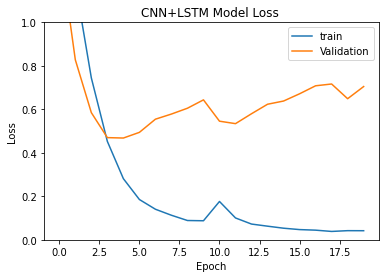

In [ ]:
import matplotlib.pyplot as plt
plt.title('CNN+LSTM Model Loss ')
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

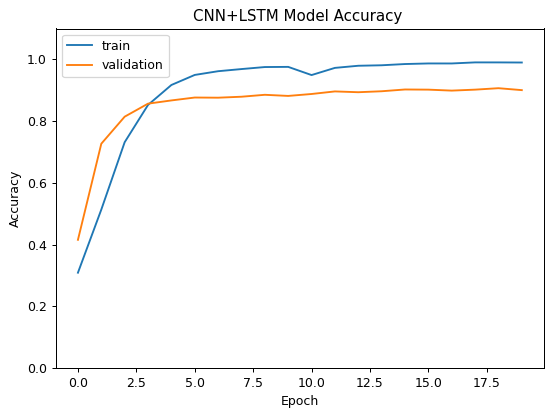

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('CNN+LSTM Model Accuracy ')
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# LSTM with GRU layer
from keras.layers import GRU

model_3 = Sequential()
model_3.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, trainable=True, input_length = X_train.shape[1]))
model_3.add(Dropout(rate=0.15))
model_3.add(LSTM(64, return_sequences=True, dropout=0.2, name="LSTM"))
model_3.add(GRU(64, return_sequences=False, dropout=0.2, name="GRU"))
model_3.add(Dense(64, name="Dense2"))
model_3.add(Dropout(rate=0.15))
model_3.add(Dense(16, name="Dense3"))
model_3.add(Dense(6, activation='softmax', name="Output"))
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

epochs = 20
batch_size = 64

history_3 = model_3.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.10)
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 170, 170)          8500000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 170, 170)          0         
_________________________________________________________________
LSTM (LSTM)                  (None, 170, 64)           60160     
_________________________________________________________________
GRU (GRU)                    (None, 64)                24960     
_________________________________________________________________
Dense2 (Dense)               (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
Dense3 (Dense)               (None, 16)              

In [ ]:
accr_model_3 = model_3.evaluate(X_test,Y_test)
#save keras model
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_model_3[0],accr_model_3[1]))

257/257 [==============================] - 2s 9ms/step - loss: 0.2891 - accuracy: 0.9459
Test set
  Loss: 0.289
  Accuracy: 0.946


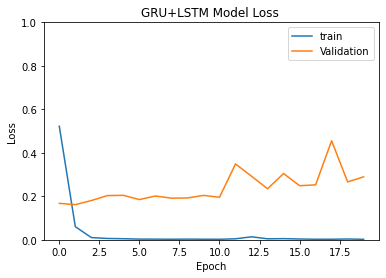

In [ ]:
import matplotlib.pyplot as plt
plt.title('GRU+LSTM Model Loss ')
plt.plot(history_3.history['loss'], label='train')
plt.plot(history_3.history['val_loss'], label='Validation')
plt.legend()
plt.ylim(0,1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches='tight')
plt.show();

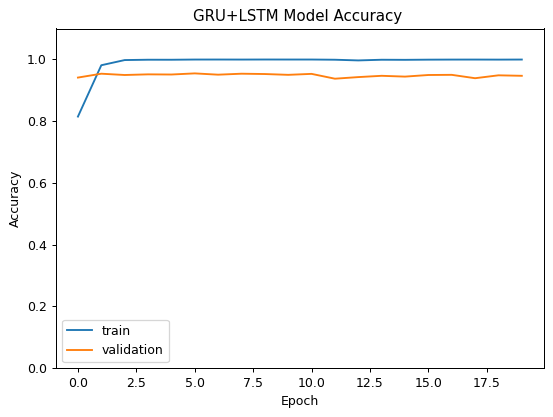

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('GRU+LSTM Model Accuracy ')
plt.plot(history_3.history['accuracy'], label='train')
plt.plot(history_3.history['val_accuracy'], label='validation')
plt.legend()
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
top_words = 100000

x_train,x_cv,y_train,y_cv = train_test_split(X_train,Y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", x_cv.shape)

# truncate and pad input sequences
max_review_length = 150
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
x_cv = sequence.pad_sequences(x_cv,maxlen=max_review_length)

embedding_vecor_length = 100
model4 = Sequential()
model4.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model4.add(SpatialDropout1D(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(6, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())
filepath="weights_best.hdf5"
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, mode='max', verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',save_weights_only=True)
callbacks_list = [early_stop,checkpoint]
model4.fit(x_train, y_train, epochs=20, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(x_cv,y_cv))

Shape of train data: (19184, 170)
Shape of Test data: (8222, 170)
Shape of CV data: (3837, 170)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 150, 100)          10000000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 150, 100)          0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 606       
Total params: 10,081,006
Trainable params: 10,081,006
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
60/60 [==============================] - 45s 719ms/step - loss: 1.5734 - accuracy: 0.4257 - val_loss: 0.6195 - val_accuracy: 0.

In [ ]:
# Final evaluation of the model
embedding_vecor_length = 100
model4 = Sequential()
model4.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model4.add(SpatialDropout1D(0.2))
model4.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(6, activation='softmax'))
model4.load_weights("weights_best.hdf5")
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model4.evaluate(X_test,  Y_test, verbose=1,batch_size = 256)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]))

33/33 [==============================] - 2s 39ms/step - loss: 0.1883 - accuracy: 0.9379
Accuracy: 93.69%
Loss: 0.19%


# Saving  Best Model

In [ ]:
model_json = model.to_json()
with open("/content/model_01-01-21-updated.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/model_01-01-21-updated.h5")
print("Saved model to disk")

4914

Saved model to disk


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size = 0.3)
embedding_vecor_length = 32
model5 = Sequential()
model5.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(GRU(64, return_sequences=True, dropout=0.2, name="GRU"))
model5.add(LSTM(100))
model5.add(Dense(6, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model5.summary())
filepath="weights_best_cnn.hdf5"
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, mode='min', verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', patience=100 ,verbose=1, save_best_only=True, mode='min',save_weights_only=True)
callbacks_list = [early_stop,checkpoint]
history_5=model5.fit(x_train, y_train, epochs=200, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(x_cv,y_cv))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 150, 32)           3200000   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 150, 32)           3104      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 75, 32)            0         
_________________________________________________________________
GRU (GRU)                    (None, 75, 64)            18816     
_________________________________________________________________
lstm_34 (LSTM)               (None, 100)               66000     
_________________________________________________________________
dense_49 (Dense)             (None, 6)                 606       
Total params: 3,288,526
Trainable params: 3,288,526
Non-trainable params: 0
___________________________________________

In [ ]:
# Final evaluation of the model
# create the model
# embedding_vecor_length = 32
# model5 = Sequential()
# model5.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
# model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model5.add(MaxPooling1D(pool_size=2))
# model5.add(LSTM(100))
# model5.add(Dense(6, activation='softmax'))
# model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model5.summary())
# model5.load_weights("/content/weights_best.hdf5")
scores = model5.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]))

Accuracy: 98.14%
Loss: 0.10%


In [ ]:
new_complaint = ['Special Assistant to the Prime Minister on National Health Services, Regulations & Coordination; Infectious Diseases Physician']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=max_review_length)
pred = model.predict(padded)
labels = ["Anti-Religion","Anti-State", "Normal", "Offensive", "Racism", "sexism"]
#Offensive= '3'
#Anti-State= '1'
#Anti-Religion= '0'
#Normal='2'
#Racism= '4'
#sexism='5'
#print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model', 'Accuracy']
table.add_row(['LSTM', 93.99])
table.add_row(['CNN using LSTM', 94.32])
print(table)

+----------------+----------+
|     Model      | Accuracy |
+----------------+----------+
|      LSTM      |  93.99   |
| CNN using LSTM |  94.32   |
+----------------+----------+


In [ ]:
accr = model5.evaluate(X_test,Y_test)
#save keras model
model.save("English_hate_detection.h5")
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

257/257 [==============================] - 2s 6ms/step - loss: 0.1050 - accuracy: 0.9814
Test set
  Loss: 0.105
  Accuracy: 0.981


In [ ]:
new_complaint = ['']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['0', '1', '2', '3','4', '5']
#print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

2


Text(0.5, 1.0, 'LSTM+GRU Model Accuracy')

<Figure size 630x450 with 0 Axes>

(0.0, 20.0)

(0.0, 1.0)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

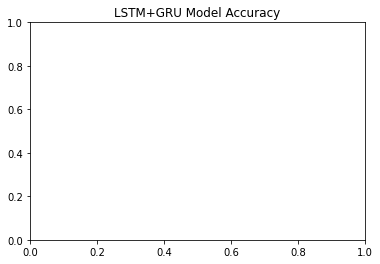

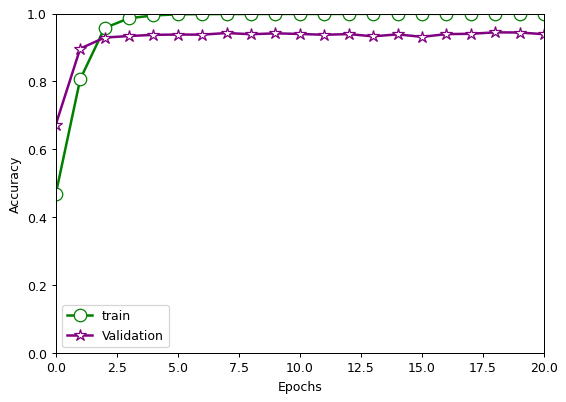

In [ ]:
plt.title('LSTM+GRU Model Accuracy')
plt.figure(figsize=(7, 5), dpi=90)
plt.plot(history_5.history['accuracy'], label='train',marker='o', markerfacecolor='white', markersize=10, color='green', linewidth=2)
plt.plot(history_5.history['val_accuracy'], label='Validation',marker='*', markerfacecolor='white', markersize=10, color='purple', linewidth=2)

axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,1])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("Accuracy_lstmgrucheck.png", dpi=90)
plt.show()

Text(0.5, 1.0, 'LSTM+GRU Model Loss')

(0.0, 20.0)

(0.0, 1.0)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

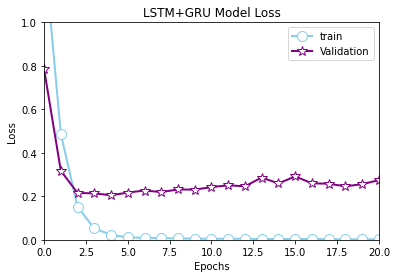

In [ ]:
plt.title('LSTM+GRU Model Loss')
plt.plot(history_5.history['loss'], label='train',marker='o', markerfacecolor='white', markersize=10, color='skyblue', linewidth=2)
plt.plot(history_5.history['val_loss'], label='Validation',marker='*', markerfacecolor='white', markersize=10, color='purple', linewidth=2)
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,1])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("Loss_lstmgrucheckpoints.png")
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/pretrained_model/nouman_model_26_01_21.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/pretrained_model/nouman_model_26_01_21.h5")
print("Saved model to disk")

3254

Saved model to disk


In [ ]:
import pickle

#save:
# f = open('/content/pretrained_model/history.pckl', 'wb')
# pickle.dump(history.history, f)
# f.close()

# retrieve:    
f = open('/content/history.pckl', 'rb')
saved_history = pickle.load(f)
f.close()


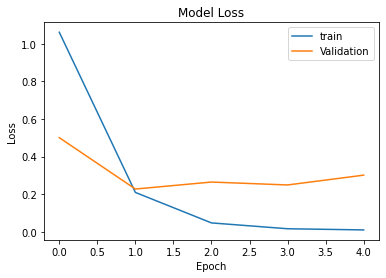

In [ ]:
import matplotlib.pyplot as plt
plt.title('Model Loss')
plt.plot(saved_history['loss'], label='train')
plt.plot(saved_history['val_loss'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('Loss.png', dpi=300, bbox_inches= 'tight')
plt.show();

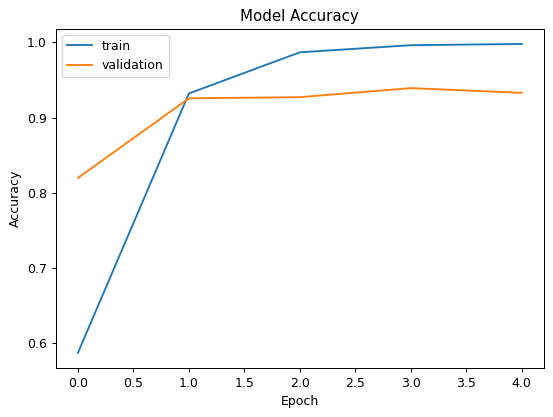

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5), dpi=90)
plt.title('Model Accuracy')
plt.plot(saved_history['accuracy'], label='train')
plt.plot(saved_history['val_accuracy'], label='validation')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig("Accuracy.png", dpi=300, bbox_inches= 'tight')
plt.show();
plt.close()

In [ ]:
#plot history of trained model using the pickle file
import matplotlib.pyplot as plt
w = 7
h = 5
d = 300
plt.figure(figsize=(w, h), dpi=d)
plt.title('Model Loss')
loss = saved_history['loss']
val_loss = saved_history['val_loss']
plt.plot(loss, label='train')
plt.plot(val_loss, label='test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig("Model_Loss.png")
plt.close()

In [ ]:
#load saved model as keras
from keras.models import load_model
keras_saved_model = load_model("/content/drive/My Drive/Colab Notebooks/Model_Weights_7_04-26-20/model.json")
Keras_score = keras_saved_model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (keras_saved_model.metrics_names[1], score[1]*100))

OSError: ignored

In [ ]:
# load json and create model
from keras.models import model_from_json
import os
json_file = open('/content/model_01-01-21-updated.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load weights into new model
loaded_model.load_weights("/content/model_01-01-21-updated.h5")
print("Loaded model from disk")
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score=loaded_model.evaluate(X_train, Y_train, verbose=0)

Loaded model from disk


KeyboardInterrupt: ignored

In [ ]:
accr_by_loaded=loaded_model.evaluate(X_test,Y_test)
accr_by_loaded

257/257 [==============================] - 39s 150ms/step - loss: 0.4189 - accuracy: 0.9261


[0.41894546151161194, 0.9260520339012146]

In [ ]:
#predict using the saved model
y_pred=model.predict_classes(X_test)#X_test in place of X_train

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
#confusion Matrix to LSTM-Classifier
#y_pred=model.predict_classes(X_test) # predict_classes used the round variable values instead of points
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import numpy as np
tests=np.argmax(Y_test, axis=1) # write the Y_test in place of Y_train convert the decimal points to rounded 
# we provide the confusion matrix a rounded value otherwise a classification matrix problem arieses
cm=confusion_matrix(y_pred, tests)
print(cm)

pd_cm=pd.DataFrame(cm)

print('Accuracy Score :',accuracy_score(tests, y_pred)) 
print('Report : ') 
print(classification_report(tests, y_pred))  
print(pd_cm)



[[1613   45    0    0   35    4]
 [  30 1576    2    0    1   11]
 [   5   12 1461   14    3   17]
 [   0    1    6 1261    0   26]
 [  59   16    0   19  755   39]
 [  11   23    6   58   28 1085]]
Accuracy Score : 0.942714667963999
Report : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1718
           1       0.97      0.94      0.96      1673
           2       0.97      0.99      0.98      1475
           3       0.97      0.93      0.95      1352
           4       0.85      0.92      0.88       822
           5       0.90      0.92      0.91      1182

    accuracy                           0.94      8222
   macro avg       0.94      0.94      0.94      8222
weighted avg       0.94      0.94      0.94      8222

      0     1     2     3    4     5
0  1613    45     0     0   35     4
1    30  1576     2     0    1    11
2     5    12  1461    14    3    17
3     0     1     6  1261    0    26
4    59    16     0    19  7

,Precision,Recall,F1-Score,Support
Anti-Religion,0.930351,0.956345,0.943169,1718.0
Anti-State,0.959330,0.958757,0.959043,1673.0
Neutral,0.926721,0.994576,0.959451,1475.0
Racism,0.970477,0.948225,0.959222,1352.0
Sexism,0.901266,0.866180,0.883375,822.0
Offensive,0.949541,0.875635,0.911092,1182.0


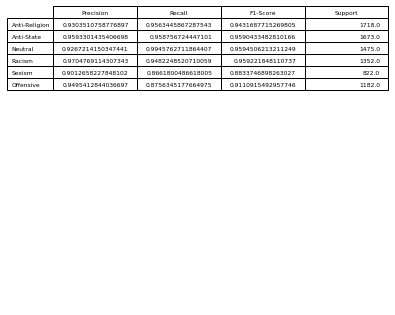

In [ ]:
#printing classification report 
report = classification_report(tests, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.index=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive","accuracy","macro avg","weighted avg"]
df_report.columns=["Precision", "Recall", "F1-Score", "Support"]
df_report[0:6]
#saving the classification report as a png
from pandas.plotting import table # EDIT: see deprecation warnings below
ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_report[0:6],loc='top')  # where df is your data frame

plt.savefig('Classification_report.png', dpi=300,bbox_inches='tight')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'Actual')

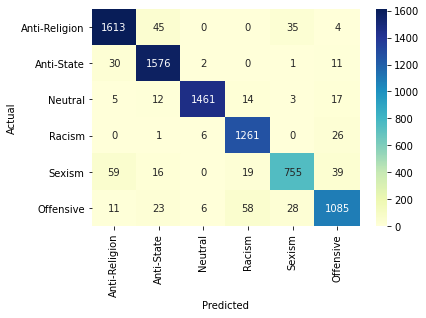

In [ ]:
#confusion matrix by seaborn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    tests,
        'y_Predicted': y_pred,
        }

# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted', 'Lables'])
# df.head()
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'],rownames=['Actual'],colnames=['Predicted'])
# confusion_matrix
# sn.heatmap(confusion_matrix, annot=True,fmt="d", cmap="YlGnBu")
# plt.savefig('save_as_a_png.png', dpi=400)


pd_cm.columns=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive"]
pd_cm.index=["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive"]
sn.heatmap(pd_cm, annot=True,fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.savefig("stacked_lstm(94).png" ,dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
my_categories=["Anti-Religion","Anti-State", "Neutral", "Offensive",  "Racism", "Sexism"]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning:

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.



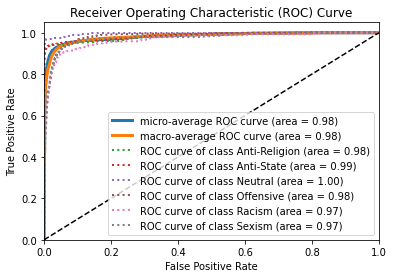

In [ ]:
meu.plot_model_roc_curve(model_2, X_test, Y_test, class_names=my_categories)
plt.savefig('/content/Simple_LSTM_ROC.png', dpi=400, bbox_inches="tight")
plt.show()

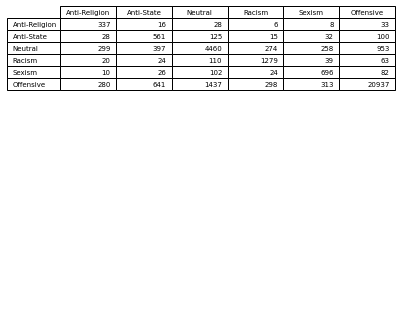

In [ ]:
#saving confusion matrix as a table 
from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, pd_cm,loc='top')  # where df is your data frame
plt.ylabel="Actual"
plt.xlabel="Predicted"
plt.savefig('mytable.png', dpi=300,bbox_inches='tight')





In [ ]:
#Test with a New tweet
new_complaint = ['you bloody bitch ']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
pred= loaded_model.predict(padded)
labels = ["Anti-Religion","Anti-State", "Neutral", "Racism", "Sexism", "Offensive" ]
print(pred, labels[np.argmax(pred)])
print(labels[np.argmax(pred)])

[[1.3565327e-07 1.3130823e-07 2.5842852e-05 9.9989712e-01 1.6655040e-08
  7.6758697e-05]] Racism
Racism
